In [29]:
import numpy as np
import gzip
import struct
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [30]:
# Define the file paths
mnist_folder = 'MNIST/'
train_images_path = mnist_folder + 'train-images-idx3-ubyte.gz'
train_labels_path = mnist_folder + 'train-labels-idx1-ubyte.gz'
test_images_path = mnist_folder + 't10k-images-idx3-ubyte.gz'
test_labels_path = mnist_folder + 't10k-labels-idx1-ubyte.gz'

# Read the files
train_images = read_idx(train_images_path)
train_labels = read_idx(train_labels_path)
test_images = read_idx(test_images_path)
test_labels = read_idx(test_labels_path)

# Print shapes to verify
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


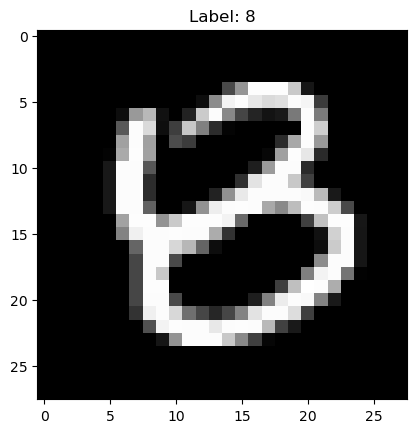

In [ ]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Plot a random training image and its label
random_index = np.random.randint(0, train_images.shape[0])
plt.imshow(train_images[random_index], cmap='gray')
plt.title(f'Label: {train_labels[random_index]}')
plt.show()

In [ ]:
# Normalize the pixel values of images to be between 0 and 1. 
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0
plt.show()

# One-hot encode the labels
num_classes = 10
train_labels_one_hot = np.eye(num_classes)[train_labels] 
test_labels_one_hot = np.eye(num_classes)[test_labels]

# Print the one-hot encoded labels to verify
print(f'Train labels one-hot shape: {train_labels_one_hot.shape}')
print(f'Test labels one-hot shape: {test_labels_one_hot.shape}')

# Print out the one-hot encoded labels for a random training example to verify
print(f'One-hot encoded label for random index {random_index}: {train_labels_one_hot[random_index]}')

Train labels one-hot shape: (60000, 10)
Test labels one-hot shape: (10000, 10)
One-hot encoded label for random index 16022: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [33]:
# Define the Sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid of x.
    
    Parameters:
    x : array-like
        Input data.
    
    Returns:
    array-like
        Sigmoid of the input data.
    """
    return 1 / (1 + np.exp(-x))

# Define the derivative of the Sigmoid function
def sigmoid_derivative(x):
    """
    Compute the derivative of the sigmoid function.
    
    Parameters:
    x : array-like
        Input data.
    
    Returns:
    array-like
        Derivative of the sigmoid function.
    """
    return sigmoid(x) * (1 - sigmoid(x))

# Define the Softmax function
def softmax(x):
    """
    Compute the softmax of x.
    
    Parameters:
    x : array-like
        Input data.
    
    Returns:
    array-like
        Softmax of the input data.
    """
    exp_x = np.exp(x)  # for numerical stability
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [ ]:
# Set the seed value to 695
np.random.seed(695)

# Input layer size (flattened 28x28 image)
input_size = 784

# Hidden layer sizes
hidden_size_1 = 128
hidden_size_2 = 64

# Output layer size (10 classes for MNIST digits)
output_size = 10

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size_1)  # weights for input to hidden layer 1
b1 = np.random.randn(hidden_size_1) # bias for hidden layer 1
W2 = np.random.randn(hidden_size_1, hidden_size_2) # weights for hidden layer 1 to hidden layer 2
b2 = np.random.randn(hidden_size_2) # bias for hidden layer 2
W3 = np.random.randn(hidden_size_2, output_size) # weights for hidden layer 2 to output layer
b3 = np.random.randn(output_size)  # bias for output layer

# Print the shapes of the initialized weights and biases to verify
print(f'W1 shape: {W1.shape}, b1 shape: {b1.shape}')
print(f'W2 shape: {W2.shape}, b2 shape: {b2.shape}')
print(f'W3 shape: {W3.shape}, b3 shape: {b3.shape}')

# Print out the initialized weights and biases for verification
print('Initialized weights and biases:')
print(f'W1: {W1[:5]}')  # print first 5 rows for brevity
print(f'b1: {b1}')
print(f'W2: {W2[:5]}')  # print first 5 rows for brevity
print(f'b2: {b2}')
print(f'W3: {W3[:5]}')  # print first 5 rows for brevity
print(f'b3: {b3}')

W1 shape: (784, 128), b1 shape: (128,)
W2 shape: (128, 64), b2 shape: (64,)
W3 shape: (64, 10), b3 shape: (10,)
Initialized weights and biases:
W1: [[ 0.88274678  0.73073724  1.07367507  0.87400945  0.33201457  1.03325444
  -0.9842516  -0.11773842 -0.12174421  0.56024983  0.10603242  0.22039459
   0.67079029  1.57324689  0.17749223 -0.87630483  0.99981554  0.01155677
   0.93656184  0.7517955  -1.06210089 -0.34626975 -1.65874057 -0.53028171
  -0.83724318  0.76450932  0.25891852  0.95980358 -1.24814418  0.40718558
  -0.51349837 -0.9444435  -0.21694368 -0.2419231  -0.80125031  1.71339651
   1.94037891  1.70914601  0.59251865 -0.37871811  0.0196007   0.7363176
  -0.2461596   1.64706242  0.07000762  0.70074937  0.92503637 -0.38004665
   0.86041913  0.13768781  0.8956862   1.62368088  0.06655969 -0.34753991
  -1.29692121  0.76554231 -1.11119157 -0.71573288 -1.34258196  0.1966489
  -0.31902713  2.56032295 -1.45487     1.5787623  -0.46207077  2.01332988
  -1.39782442  0.46863485 -0.5858604   0

In [35]:
# Define the feedforward function
def feed_forward(x):
    global W1, b1, W2, b2, W3, b3
    
    # First layer
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    
    # Second layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    # Output layer
    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)
    
    return a3

In [36]:
def categorical_cross_entropy(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
    return -np.sum(y_true * np.log(y_pred_clipped)) / n_samples

In [37]:
# Define the back_propagation function
def back_propagation(x, y_true, a1, a2, a3, learning_rate):
    global W1, b1, W2, b2, W3, b3
    
    # Number of samples
    n_samples = y_true.shape[0]
    
    # Calculate the gradient of the loss with respect to the output layer
    output_error = a3 - y_true  # (n_samples, output_size)
    
    # Calculate the gradients for W3 and b3
    W3_gradient = np.dot(a2.T, output_error) / n_samples  # (hidden_size_2, output_size)
    b3_gradient = np.sum(output_error, axis=0) / n_samples  # (output_size,)
    
    # Backpropagate to hidden layer 2
    hidden_error_2 = np.dot(output_error, W3.T) * sigmoid_derivative(a2)  # (n_samples, hidden_size_2)
    
    # Calculate the gradients for W2 and b2
    W2_gradient = np.dot(a1.T, hidden_error_2) / n_samples  # (hidden_size_1, hidden_size_2)
    b2_gradient = np.sum(hidden_error_2, axis=0) / n_samples  # (hidden_size_2,)
    
    # Backpropagate to hidden layer 1
    hidden_error_1 = np.dot(hidden_error_2, W2.T) * sigmoid_derivative(a1)  # (n_samples, hidden_size_1)
    
    # Calculate the gradients for W1 and b1
    W1_gradient = np.dot(x.T, hidden_error_1) / n_samples  # (input_size, hidden_size_1)
    b1_gradient = np.sum(hidden_error_1, axis=0) / n_samples  # (hidden_size_1,)
    
    # Update weights and biases
    W3 -= learning_rate * W3_gradient
    b3 -= learning_rate * b3_gradient
    W2 -= learning_rate * W2_gradient
    b2 -= learning_rate * b2_gradient
    W1 -= learning_rate * W1_gradient
    b1 -= learning_rate * b1_gradient

In [ ]:
# Initialize hyperparameters
batch_size = 128
learning_rate = 0.01
epochs = 100

#Initialize the number of samples and batches
num_samples = train_images.shape[0]
num_batches = num_samples // batch_size

for epoch in range(epochs):
    # Shuffle the training data between epochs
    shuffled_indices = np.random.permutation(num_samples)
    train_images = train_images[shuffled_indices]
    train_labels_one_hot = train_labels_one_hot[shuffled_indices]
    
    for batch in range(num_batches):
        # Get the batch data
        x_batch = train_images[batch * batch_size:(batch + 1) * batch_size].reshape(batch_size, -1)
        y_batch = train_labels_one_hot[batch * batch_size:(batch + 1) * batch_size]
        
        # Forward pass
        a1 = sigmoid(np.dot(x_batch, W1) + b1)
        a2 = sigmoid(np.dot(a1, W2) + b2)
        a3 = softmax(np.dot(a2, W3) + b3)
        
        # Backward pass
        back_propagation(x_batch, y_batch, a1, a2, a3, learning_rate)

        # Calculate loss for the current epoch
        loss = categorical_cross_entropy(y_batch, a3)

    #Print the loss every epoch
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

Epoch 1/100, Loss: 1.6124
Epoch 2/100, Loss: 1.3492
Epoch 3/100, Loss: 0.9645
Epoch 4/100, Loss: 1.1045
Epoch 5/100, Loss: 0.7445
Epoch 6/100, Loss: 0.9078
Epoch 7/100, Loss: 0.7800
Epoch 8/100, Loss: 0.7281
Epoch 9/100, Loss: 0.4528
Epoch 10/100, Loss: 0.6782
Epoch 11/100, Loss: 0.5882
Epoch 12/100, Loss: 0.5844
Epoch 13/100, Loss: 0.5488
Epoch 14/100, Loss: 0.8505
Epoch 15/100, Loss: 0.6715
Epoch 16/100, Loss: 0.5296
Epoch 17/100, Loss: 0.5247
Epoch 18/100, Loss: 0.5005
Epoch 19/100, Loss: 0.4223
Epoch 20/100, Loss: 0.4249
Epoch 21/100, Loss: 0.5132
Epoch 22/100, Loss: 0.5723
Epoch 23/100, Loss: 0.4296
Epoch 24/100, Loss: 0.5354
Epoch 25/100, Loss: 0.7873
Epoch 26/100, Loss: 0.4754
Epoch 27/100, Loss: 0.6479
Epoch 28/100, Loss: 0.4786
Epoch 29/100, Loss: 0.6971
Epoch 30/100, Loss: 0.6263
Epoch 31/100, Loss: 0.3536
Epoch 32/100, Loss: 0.5847
Epoch 33/100, Loss: 0.4993
Epoch 34/100, Loss: 0.6208
Epoch 35/100, Loss: 0.3496
Epoch 36/100, Loss: 0.3696
Epoch 37/100, Loss: 0.4073
Epoch 38/1

Accuracy: 88.04%


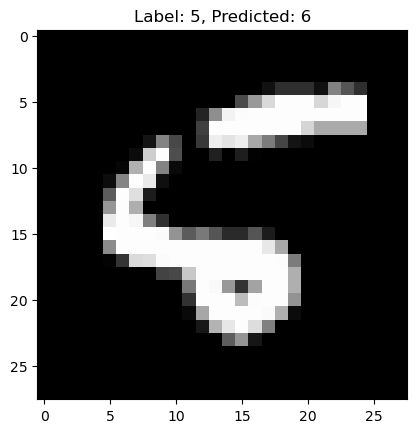

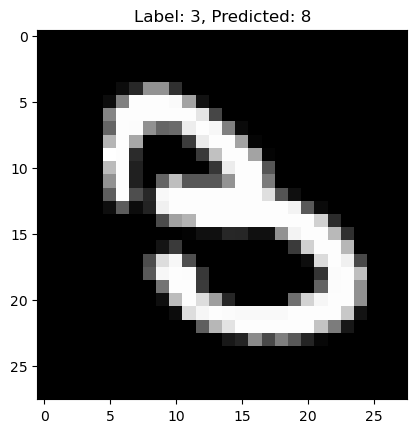

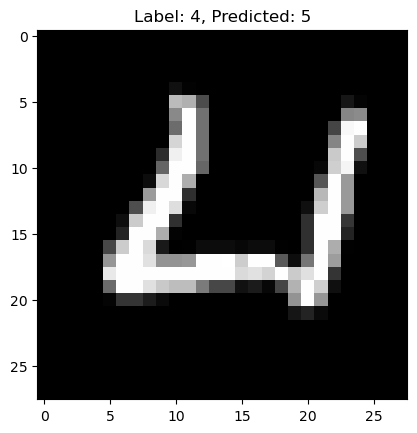

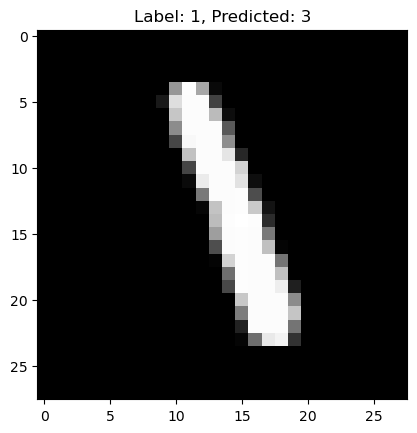

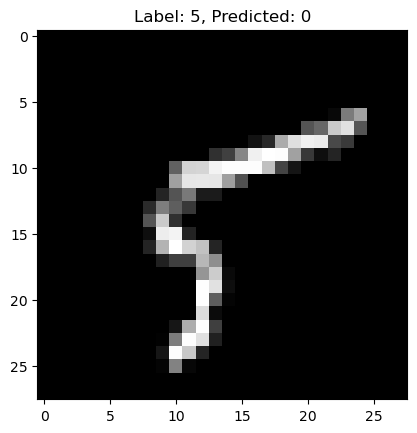

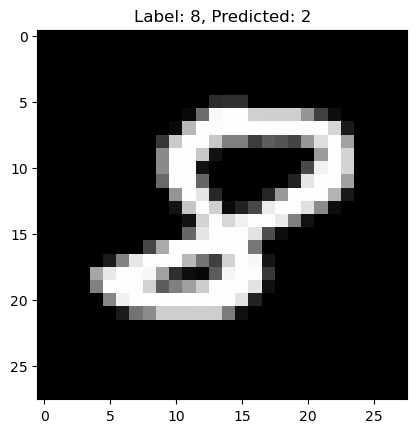

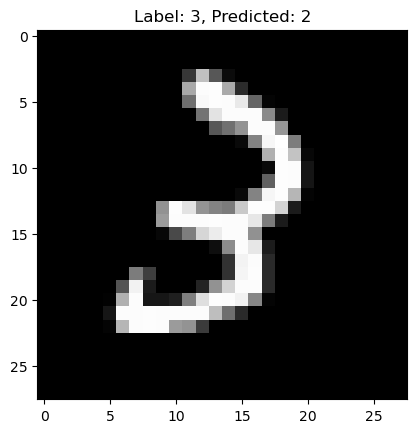

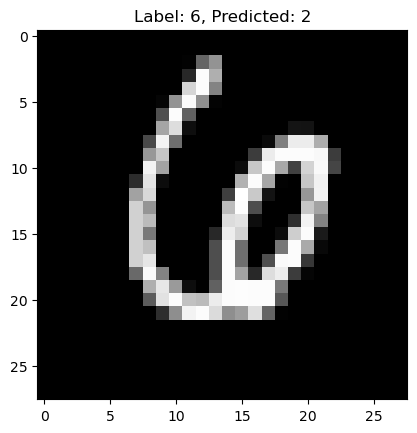

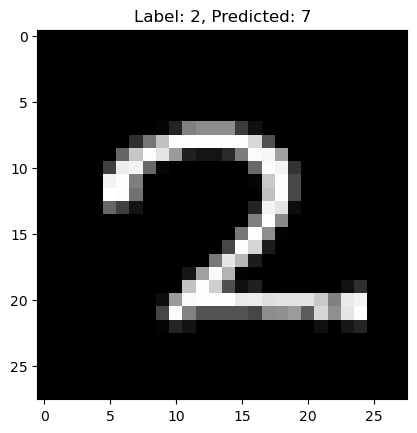

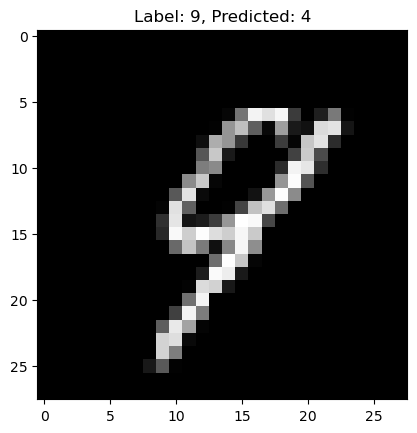

In [41]:
# Evaluate the model on the test dataset
x_test_flattened = test_images.reshape(-1, input_size)  # Flatten the test images
a3 = feed_forward(x_test_flattened)  # Perform feed-forward pass
predicted = np.argmax(a3, axis=1)  # Get the predicted class labels
accuracy = np.mean(predicted == test_labels)  # Calculate the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')  # Print the accuracy

# Display misclassified images with their predicted and true labels
incorrect_indices = np.where(predicted != test_labels)[0]  # Find indices of incorrect predictions
for i in range(10):  # Display the first 5 incorrect predictions
    index = incorrect_indices[i]
    plt.imshow(test_images[index], cmap='gray')  # Display the image
    plt.title(f'Label: {test_labels[index]}, Predicted: {predicted[index]}')  # Show the true label and the prediction
    plt.show()  # Display the plot
